In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime



In [2]:
df = pd.read_csv('../Data/Dados Sujos/clientesSujos.csv')

In [3]:
df.head()

,Nome,Nascimento,Salário,Cargo
0,FILIPE COSTA,05/02/1998,3732.0,Assistente
1,VICTOR CRUZ,28/03/2002,11799.0,Assistente
2,OTÁVIO SILVA,15/07/1991,1000.0,Estagiário
3,JOÃO CRUZ,08/11/2004,4264.0,Gerente
4,GUSTAVO NETO,25/05/1994,1000.0,Estagiário


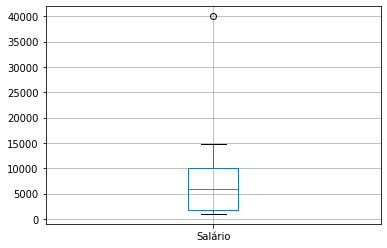

In [4]:
df.boxplot(column='Salário')
plt.show()

In [5]:
# Descobrindo valores ausentes
df.isnull().sum()

Nome          1
Nascimento    0
Salário       0
Cargo         0
dtype: int64

In [6]:
# Imprimindo as linhas com valores ausentes
print(df[df.isnull().any(axis=1)])

    Nome  Nascimento  Salário       Cargo
100  NaN  05/08/1990   1000.0  Estagiário


In [7]:
# Média de salários por cargo
print(df.groupby('Cargo').mean())

                Salário
Cargo                  
Analista    5930.571429
Assistente  8598.238095
Diretor     8985.545455
Estagiário  1000.000000
Gerente     7484.724138


C:\Users\Pichau\AppData\Local\Temp\ipykernel_13540\2846044267.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby('Cargo').mean())


In [8]:
# Média de salários por cargo
print(df.groupby('Cargo').median())

                Salário
Cargo                  
Analista    4819.500000
Assistente  9343.000000
Diretor     7205.000000
Estagiário  1000.000000
Gerente     7179.362069


C:\Users\Pichau\AppData\Local\Temp\ipykernel_13540\246265820.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby('Cargo').median())


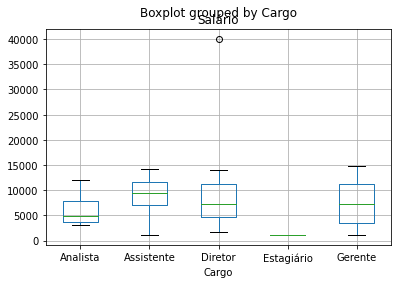

In [9]:
# Boxplot de salários por cargo
df.boxplot(column='Salário', by='Cargo')
plt.show()

In [10]:
# Preenchendo valores ausentes com a média dos salários dos cargos
df['Salário'] = df['Salário'].fillna(df.groupby('Cargo')['Salário'].transform('mean'))

In [11]:
# Imprimindo as linhas com valores ausentes
print(df[102:105])

              Nome  Nascimento      Salário       Cargo
102    MAYCON CRUZ  21/04/1999  1000.000000  Estagiário
103    FILIPE CRUZ  01/08/2001  7484.724138     Gerente
104  PEDRO NÁPOLES  05/13/1990  1000.000000     Gerente


In [12]:
# Imprimindo quantidades de duplicados
print(df.duplicated().sum())
# Identificando duplicados
print(df[df.duplicated()])
# Imprimindo as linhas duplicadas
print(df[df.duplicated(keep=False)])


0
Empty DataFrame
Columns: [Nome, Nascimento, Salário, Cargo]
Index: []
Empty DataFrame
Columns: [Nome, Nascimento, Salário, Cargo]
Index: []


In [13]:
# Removendo duplicados
df = df.drop_duplicates()

In [14]:
#Identificando erros de digitação
print(df['Cargo'].unique())


['Assistente' 'Estagiário' 'Gerente' 'Diretor' 'Analista']


In [15]:
#Substituindo valores 'Direto' por 'Diretor' e "Asistente" por "Assistente"
# df['Cargo'] = df['Cargo'].str.replace('Direto','Diretor')

# Cuidado, a ocorrencia de 'Direto' tem que ser exata
df['Cargo'] = df['Cargo'].str.replace(r'\bDireto\b','Diretor')
df['Cargo'] = df['Cargo'].str.replace('Asistente','Assistente')
print(df['Cargo'].unique())

['Assistente' 'Estagiário' 'Gerente' 'Diretor' 'Analista']


C:\Users\Pichau\AppData\Local\Temp\ipykernel_13540\686472207.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cargo'] = df['Cargo'].str.replace(r'\bDireto\b','Diretor')


In [16]:
df_datas = pd.DataFrame()
df_datas['data'] = df['Nascimento']
df_datas.head()

,data
0,05/02/1998
1,28/03/2002
2,15/07/1991
3,08/11/2004
4,25/05/1994


In [17]:
df_datas['data'] = pd.to_datetime(df_datas['data'], errors='coerce')
df_datas['cargo'] = df['Cargo']

# Identificar as linhas onde a conversão resultou em NaT (entradas inválidas ou formatos inesperados)
linhas_com_erro = df_datas[df_datas['data'].isna()]

if not linhas_com_erro.empty:
    print("Linhas com datas não convertíveis para datetime:")
    print(linhas_com_erro)

# Para as linhas válidas, extração de dia, mês e ano, e cálculo da idade
df_datas.dropna(subset=['data'], inplace=True)  # Opcional: remover linhas com NaT se desejar
df_datas['dia'] = df_datas['data'].dt.day
df_datas['mes'] = df_datas['data'].dt.month
df_datas['ano'] = df_datas['data'].dt.year
df_datas['idade'] = 2024 - df_datas['ano']

df_datas.head()


C:\Users\Pichau\AppData\Local\Temp\ipykernel_13540\1163797224.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_datas['data'] = pd.to_datetime(df_datas['data'], errors='coerce')


,data,cargo,dia,mes,ano,idade
0,1998-05-02,Assistente,2,5,1998,26
1,2002-03-28,Assistente,28,3,2002,22
2,1991-07-15,Estagiário,15,7,1991,33
3,2004-08-11,Gerente,11,8,2004,20
4,1994-05-25,Estagiário,25,5,1994,30


In [18]:
df[101:108]

,Nome,Nascimento,Salário,Cargo
101,JÚLIO MASSI,01/01/1996,1000.000000,Estagiário
102,MAYCON CRUZ,21/04/1999,1000.000000,Estagiário
103,FILIPE CRUZ,01/08/2001,7484.724138,Gerente
104,PEDRO NÁPOLES,05/13/1990,1000.000000,Gerente
105,OTÁVIO SOARES,01/01/1997,1000.000000,Assistente
106,VICTOR RODRIGUES,01/01/1995,40000.000000,Diretor
107,VANESSA OLIVEIRA,01/01/1995,7194.000000,Diretor


In [19]:
#imprimir a média de idade por cargo
print(df_datas.groupby('cargo')['idade'].median())

cargo
Analista      24.0
Assistente    27.0
Diretor       29.0
Estagiário    28.0
Gerente       27.5
Name: idade, dtype: float64


<AxesSubplot:>

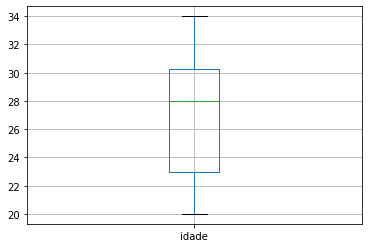

In [20]:
df_datas.boxplot(column='idade')

In [21]:
#Identificando onde está o outlier
print(df_datas[df_datas['idade'] > 100])

Empty DataFrame
Columns: [data, cargo, dia, mes, ano, idade]
Index: []


In [22]:
# 102,106,107,108 São linhas com erros de data, podemos preencher com a mediana por cargo
media_diretor = 29
media_assistente = 27
media_estagiario = 28
nascimento_diretor = '01/01/1995'
nascimento_assistente = '01/01/1997'
nascimento_estagiario = '01/01/1996'
df.loc[102, 'Nascimento'] = nascimento_estagiario
df.loc[106, 'Nascimento'] = nascimento_assistente
df.loc[107, 'Nascimento'] = nascimento_diretor
df.loc[108, 'Nascimento'] = nascimento_diretor

df[101:108]

,Nome,Nascimento,Salário,Cargo
101,JÚLIO MASSI,01/01/1996,1000.000000,Estagiário
102,MAYCON CRUZ,01/01/1996,1000.000000,Estagiário
103,FILIPE CRUZ,01/08/2001,7484.724138,Gerente
104,PEDRO NÁPOLES,05/13/1990,1000.000000,Gerente
105,OTÁVIO SOARES,01/01/1997,1000.000000,Assistente
106,VICTOR RODRIGUES,01/01/1997,40000.000000,Diretor
107,VANESSA OLIVEIRA,01/01/1995,7194.000000,Diretor


<AxesSubplot:title={'center':'Salário'}, xlabel='Cargo'>

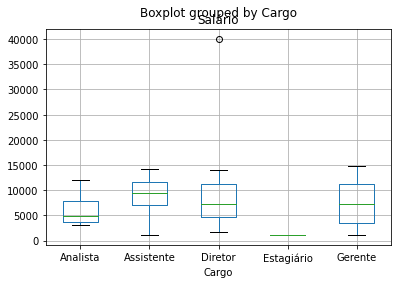

In [23]:
df.boxplot(column='Salário', by='Cargo')

In [24]:
#Identificando salário negativo
print(df[df['Salário'] < 0])

Empty DataFrame
Columns: [Nome, Nascimento, Salário, Cargo]
Index: []


In [25]:
# 109 é um erro de digitação, vamos preencher com a mediana do cargo
# Mediana de salários por cargo
mediana_Diretor = df.groupby('Cargo').median().at['Diretor', 'Salário']
df.loc[108, 'Salário'] = mediana_Diretor

C:\Users\Pichau\AppData\Local\Temp\ipykernel_13540\3488311384.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mediana_Diretor = df.groupby('Cargo').median().at['Diretor', 'Salário']


In [26]:
df.tail()

,Nome,Nascimento,Salário,Cargo
104,PEDRO NÁPOLES,05/13/1990,1000.0,Gerente
105,OTÁVIO SOARES,01/01/1997,1000.0,Assistente
106,VICTOR RODRIGUES,01/01/1997,40000.0,Diretor
107,VANESSA OLIVEIRA,01/01/1995,7194.0,Diretor
108,NaN,01/01/1995,7205.0,NaN


In [27]:
# Salvando o dataframe limpo
df.to_csv('../Data/Dados Sujos/clientesLimpos.csv', index=False)

In [28]:
# Transformando cargos em numéricos
df['Cargo'] = df['Cargo'].astype('category').cat.codes
df.head()

,Nome,Nascimento,Salário,Cargo
0,FILIPE COSTA,05/02/1998,3732.0,1
1,VICTOR CRUZ,28/03/2002,11799.0,1
2,OTÁVIO SILVA,15/07/1991,1000.0,3
3,JOÃO CRUZ,08/11/2004,4264.0,4
4,GUSTAVO NETO,25/05/1994,1000.0,3


In [29]:
# 